In this simulation we are calculating TTT and CCT diagrams for following the cooling behaviour of the PM Steels.
The current notebook follows presentation given by A.Malakizadi:

Diploma work No. 42/2010
at Department of Materials and Manufacturing Technology
CHALMERS UNIVERSITY OF TECHNOLOGY
Gotheburg Sweden

Note this is applied to BMG material AMZ4.


# Constitutive equation and finite element formulation

Heat equation is given here in the general form to model also the phase transformations during the phase transformations of the alloy:

Conservation of the energy is given by the equation:
$$
\rho \frac{\partial E}{\partial t} - \nabla(k\nabla T)= 0
$$
where the E is specific internal energy. $ \rho, k$ and $T,t$ are density, thermal conductivity, temperature and time.
Specific internal energy can also be represented using:
$$
E(t,x)= e(T,X_i)
$$
where $ X_i $ for $i={1,2,3,4}$ are volume fraction for example of the perlite, bainite, ferrite and martensite phase.
Differenting the $e(T,X_i)$ with the respect to internal variables:
$$
\frac{\partial e}{\partial T} = c_p \\
\frac{\partial e}{\partial X_i}=-q_i
$$
Thus the general equation is given by:

$$
\rho(T)c_p(T)\frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(k(T)\frac{\partial T}{\partial x}) +
\frac{\partial }{\partial y}(k(T)\frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(k(T)\frac{\partial T}{\partial z})
+\sum{\rho_i(T)q_i(T) \frac{\partial X_i}{\partial t}}
$$

It is important to set also the correct boundary conditions and initial boundary conditions  for the cooling:

Cooling condition for radiation and air convection:
$$
-k\frac{\partial T}{\partial n} = h_c(T) (T-T_{\infty})+\sigma\epsilon(T)(T^{4}-T^{4}_\infty)
$$
If we are cooling by water or quenching:
$$
-k\frac{\partial T}{\partial n} = h_q(T) (T-T_{\infty})
$$
And the start temperature of the sample is given:
$$
T_0 = T(x,y,0)
$$
here the $h_c(T)$ is the convective heat transfer coefficient, $\sigma$ is the Stefan-Boltzmann constant, and $\epsilon $ is radiation emissivity of the surface and $T_\infty$ is the sorounding temperature.
It is possible to reduce the surface radiation to:
$$
\sigma \epsilon(T) (T^4-T^4_\infty)= \sigma \epsilon(T)(T^2+T^2_\infty)(T+T_\infty)(T-T_\infty)=h_r(T)(T-T_\infty)
$$
So combined radiation and convection boundary condition can be expressed by:
$$
-k\frac{\partial T}{\partial n}=h_r(T)(T-T_\infty)+h_c(T) (T-T_{\infty})=h_{rc}(T)(T-T_{\infty})
$$
where $h_{rc}$ is combined heat transfer.  

$$
\rho(T)c_p(T) \frac{\partial T}{\partial t} =k(T)\left( \frac{1}{r}  \frac{\partial }{\partial r}(r\frac{\partial T}{\partial r})+ \frac{\partial^2 T}{\partial z^2}\right)+\sum{\rho_i(T)q_i(T)\frac{\partial X_i}{\partial t}}
$$

## Incoperation of the phase transformation terms

Phase transformation in weak formulation for the phase transformation.
$$
R = \int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\rho_i q_i \frac{\partial X_i}{\partial t} rdrdz}
$$
At constant pressure is the latent heat of transformations are equal to entalphy changes $\rho q_i = \Delta H_i$

$$
R=\int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\Delta H_i \frac{\partial X_i}{\partial t} rdrdz}
$$
Time derivative can be approximated:
$$
\frac{\partial X_i}{\partial t} = \frac{\Delta X_i}{\Delta t}=\frac{X_i^{j+1}-X_i^{j}}{\Delta t}
$$
where $X^{j+1}_i$ is the volume fraction of the phase $i$ at time $j+1$. The thermal properties of the mixture are calculated
using the mixture rule:
$$
\rho c_p = \sum{X_i\rho_i c_{p_i}} \\
k = \sum{X_i k_i}
$$
Both models JMAK and AR model can be used to calculate the amount of the diffusive transformation. We focus now on the JMAK model.


# Scheil principle


The kinetics of the transformation during cooling (anisothermal condition) according to Scheil principle can the approximated by means of infinitesimal time increments $\Delta t$ and ficitious time $t^{*}$ need to gain same fraction of phase $i$ at the current temperature $T_j$

$$
t_j = \Delta t + t_j^{*}
$$
where we can calculate $t^{*}$ from JMAK model as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-X_{i,j-1}})}{k(T_j)}\right]^{1/n(T_j)}
$$
In the case of the remaining austenite phase we should correct $X_{i,j-1}$ with:
$$
F_{i,j-1}=\frac{X_{i,j-1}}{X_{i,j-1}+X_{\gamma,j-1}}
$$
then previous equation is written as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k(T_j)}\right]^{1/n(T_j)}
$$
This equation is valid for the experimentaly measured TTT diagram in the case of the BMG 
we use the Kissinger analysis to calculate the JMAK parameters:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k_0 \exp(\frac{-E}{kT_j})}\right]^{1/n(T_j)}
$$
where now $$ k(T_j) = k_0 \exp(\frac{-E}{kT_j})$$
So we can calculate then the fictious volume fraction of phase $i$ at time $j$:
$$
F_{i,j}^{*}=1-exp\left(-k(T_j)t_j^{n(T_j)} \right)
$$
The incubation time of the diffusive transformation are calculated using equation:
$$
Q = \int_{0}^{t} \frac{d\epsilon}{\tau_s(T(\epsilon))}= \sum\frac{\Delta t}{\tau_s(T_j)}
$$


## Test case

For this test case we are using the data available from the thesis "Modeling of Bulk Metallic Glass formation
in Powder Bed Fusion" by John Lindwall from http://www.ltu.se ISBN 978-91-7790-306-2

Specific heat is modelled as function it is taken from the thesis and it is based on the data measured in the
paper Heinrich et al.

In [1]:
def h(T):
    a = 5.225E-4
    b = 1.031E+7
    R = 8.134
    c = 0.00623
    d = -6.047E-7
    if (T <= (470+273)):
        return 3*R + c * T + d * T**(-2)
    elif ( (470+273) < T < (1200+273) ):
        return 3*R + a * T + b * T**(-2)
    return 0


Plot the cp (specific heat) of the alloy to see if the function correspond to experimental data

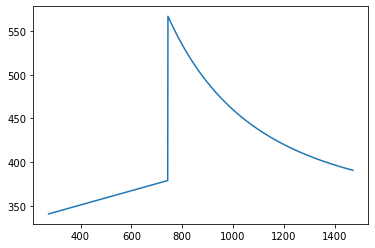

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
temp = []
cp = []
rhoAMZ4 = 76.595E-3

for step in range(1,1200):
    val = h(step+273)/rhoAMZ4
    cp.append(val)
    temp.append(step+273)
plt.plot(temp,cp)
plt.show()

In [3]:
cp[470+273]-cp[471+273]

0.2487338849102798

In [4]:
rho=6.7
omega=4.20E-6
def kAMZ4(T):
    return h(T) * rho * omega

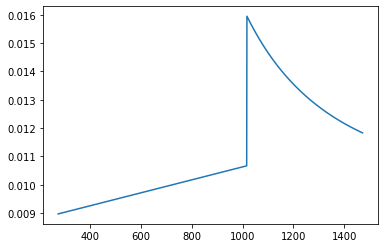

In [5]:
kam = []
temp = []
for step in range(1,1200):
    val = kAMZ4(step)/rhoAMZ4
    kam.append(val)
    temp.append(step+273)
plt.plot(temp,kam)
plt.show()

## Note this is the test case for the PM steels 
Assuming that the Jominy test can be treated as the semi-infinite plate. The surface exposed to convective boundary condition exposed on one side, the analytical solution is given as:
$$
\frac{T(x,t)-T_i}{T_{\infty}-T_i}=erfc \left(\frac{x}{2\sqrt{\alpha t}}\right) - exp\left(\frac{h x }{k}+\frac{h^2 \alpha t }{k^2}\right)
erfc\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t} }{k}\right)
$$
The temperature distribution of the bar at different position $x$ and time $t$ can be obtained if we know distribution of temperature $T$ at previous time step $t_{i-1}$.

In [6]:
rho=6200; Cp=500.0; k=20.0; alpha=k/(Cp*rho)
import math
def T(x,t,T):
    return math.erfc(x/(2*math.sqrt(alpha*t)))-math.exp(h(T)*x/k + (h(T)**2 * alpha * t/(k**2))) * math.erfc(x/(2*math.sqrt(alpha*t))+h(T)*math.sqrt(alpha*t)/k)

Here we calculate the temperature drop from the one dimensional solution described in previous cell, we set initial temperature of the bar to $T=1173$ K:

In [7]:
t_initial=900.0+273; t_inf=23.0+273
tr=t_initial
temp=[]
for step in range(1,200):
    a=T(0.0,step,tr)
    tr = a*(t_inf-t_initial)+t_initial
    temp.append(tr)

Plot the given temperature for position $x=0$

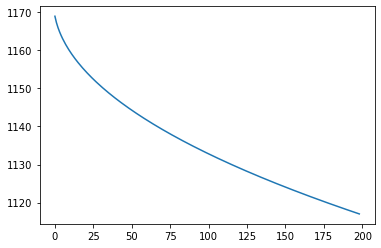

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()


# Calculation of heat transfer

In this section we solve general 2d heat equation using fipy library.

In [9]:
from fipy import *
import numpy as np

## Material properties

Here we define the material properties for the AMZ4 bulk metallic glass. The data are taken from the thesis "Modeling of Bulk Metallic glass formation in Powder Bed Fusion" by Johan Lindwall.
Data are saved in the text file for reading.
Density is taken from the paper I.Jonas W.Hembree,F.Yang,R.Busch, and A.Meyer, Appl.Phys.Lett. 112, 171902 (2018)

In [10]:
def densityAMZ4(T):
    return 6.82 - 3.48E-4 * T # density in g/cm^3

Interpolate the experimental data to get interpolating function:

We now reading the data for cooling coeficient $h_{rc}$. This coefficient contains both contributions from the radiation and convection heat transfer. The data are taken from "Analysis of temperature and microstructure in Quenching of steel cylinders" by P.R. Woodward, S.R.Chandaseker and H.T.Y. Yang

_For now this the cooling of the quenching steel_


In this section we are reading the data from the Kissinger analysis to evaluate the values of the material parameters $k(T_j)$ and $n(T_j)$. Using the previous equations we can calculate the value of $k(T_j)$:
$$
k(T_j)=k_0 \exp(-E/kT_j)
$$
and
$$
n(T_j)= const
$$

In [11]:
k0 = 9.49E+7
E = 88.8E+3
Rt = 8.314 # universal gas constant
def calcn(temperature):
    #for now the n is temperature independent    
    return 1.49
          
def calck(Fs,temperature):
    #determine k
    return -np.log(1-Fs)/(k0*np.exp(-E/(Rt*temperature)))
    
k=calck(0.005,693) #test calculations
k

0.00026079750161274424

Define some common mesh values for 2D heat flow. We create uniform cylinder mesh on which we solve axisymmetric case.

In [12]:
steps = 100
N = 40
L = 0.25*N/4000  # this is now in meters and it is about 2.5 mm
dL = L / N
dt = 1e-1
mesh = CylindricalGrid2D(dx = dL, dy = dL, nx = N, ny = N)

Also adds the fraction of different phases as cell variable, so we can calculate the contributions from different phases to heat equation.

In [13]:
fi = CellVariable(mesh=mesh, name='frac. amorphous', hasOld=True, value=0.0)
fc = CellVariable(mesh=mesh, name='frac. crystalline', hasOld=True, value=0.0)
xi = CellVariable(mesh=mesh, name='volume fract.',hasOld=True, value=0.)
temperature = CellVariable(mesh = mesh, name='temperature',value=293., hasOld=True)
tincubation = CellVariable(mesh = mesh, name='incubation', value=0., hasOld=True)
laserSource = CellVariable(mesh = mesh, name='source', value=0.)
n = CellVariable(mesh = mesh, name='jmak exponent', value=0.)
k = CellVariable(mesh = mesh, name='jmak coeff', value=0.)
(r,z) = mesh.cellCenters()

Initial temperature of the cylinder and surface is set to:
$T_o= 293$.
Boundary condition at $y=0$ is given by surface heating condition:
$$
-k \frac{\partial T}{\partial n} = q
$$
where q is given as the flux of the laser on the surface:
$$
q = Q exp((-2*(x-x_0)^2+(y-y_0)^2)/r_o^2)
$$
The boundary condition on the $x=0$ left side of the domain is isolated:
$$
-k \frac{\partial T}{\partial n} = 0
$$
The temperature on the top and right side of cylinder are set to surounding temperature:
$T_0 = T_{\infty}$

## Implementation of the body source
For the source we implement the body source according to Goldak source:
$$
q = Q exp (-3 * (2(r-r_0)^2/\omega_0^2+(z-z_0)^2/c^2))
$$
where
$$
Q = \frac{6\sqrt{3}P\eta f}{\omega^2_0 c \pi\sqrt{\pi}}
$$
this is currently implemented as the source heat in this script

In [14]:
from fipy.tools.numerix import sqrt, exp, pi
# function parameters:
# r-radius coordinate
# z-depth coordinate
# r0,z0 - laser coordinates
# omega0 - spot size of the laser
# c - depth of the laser pool
# power - laser power
def qlaser(r,z,r0,z0,omega0,c,power):
    Q = 6*sqrt(3)*power/(pi*sqrt(pi)*c*omega0**2)
    return Q * exp(-3 * (2*((r-r0)/omega0)**2+((z-z0)/c)**2) )   

In [15]:
qlaser(r,z,0,0,0.1,0.01,100)

array([1866268.34925476, 1866259.60114237, 1866242.10504062, ...,
       1549346.28363577, 1549070.33090677, 1548787.16737061])

In [16]:
t_inf = 293
#vh = np.vectorize(h)
#temperature.faceGrad.dot([0,1]).constrain(-vh(temperature.faceValue)*1/k*(temperature.faceValue-t_inf),mesh.facesBottom)
temperature.faceGrad.dot([0,1]).constrain(0,mesh.facesBottom)
temperature.faceGrad.dot([1,0]).constrain(0,mesh.facesLeft)
temperature.constrain(293, mesh.facesRight)
#temperature.constrain(1173., mesh.facesTop)

Calculation of the transformation time (incubation time) before start of diffusive reaction:

In [17]:
def transformation_time(fc,k,n):
    return (np.log(1./(1.-fc)) / k)**(1./n)
def volume_fraction(time,k,n):
    fc.setValue(1-np.exp(-k *time**n), where= tincubation > 1.)

C:\Users\tonii\Anaconda2\envs\idp\lib\site-packages\fipy\variables\variable.py:1148: RuntimeWarning: divide by zero encountered in true_divide
  return self._BinaryOperatorVariable(lambda a, b: b / a, other)
C:\Users\tonii\Anaconda2\envs\idp\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  


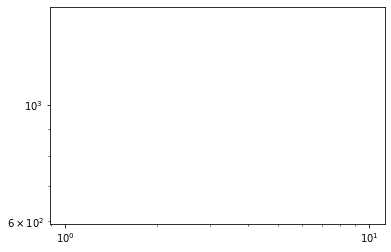

In [18]:
transf = []
temp = []
for step in range(1,1200):
    kt = k0*np.exp(-E/(Rt*(step+273)))
    val = transformation_time(0.95,kt,n)
    transf.append(val)
    temp.append(step+273)
plt.loglog(transf,temp)
plt.show()

Define the source term for the phase transformation effects. The phase transformation source contains the fraction of the amorphous phase transformed in crystalline and enthalpy of the formation.
Singh and Dubey expressed the difference of specific heat between the undercooled liquid and the crystalline state:
$$
\Delta C_p = C_{p,m}(\frac{T_m}{T})^2\exp(-\sigma_D\frac{\Delta T}{T})
$$
where:
$$
\sigma_D = \frac{T_g}{T_m-T_g}\ln((\frac{T_m}{T_g})^2 \frac{\Delta C_{p,m}}{\Delta C_{p,g}})
$$


In [19]:
Tg=470+273
Tm=920+273
deltaCpm = 20.18 # specific heat difference at melting J/g
deltaCpg = 13.3 # specific heat diff. at glass transition J/g
sigmaD = Tg/(Tm-Tg) * np.log((Tm/Tg)**2 * deltaCpm/deltaCpg)
def deltaCp(T,deltaT):
    return deltaCpm*(Tm/T)**2 * np.exp(-sigmaD * deltaT/T)
def phaseSourceT(temp):
    return TransientTerm(var=fi,coeff=deltaCp(temp,Tm-temp))+TransientTerm(var=fc,coeff=deltaCp(temp,Tm-temp))

Now setup the temperature equation for source term comming from the phase transformations defined the flag phaseTrans.
Here we added also same flux from the right side of the cylinder, assuming that the cooling liquid is also hitting the right side of cylinder.

In [20]:
rho = 6820 # for now the density is constant in temperature equation kg/m**3
Cp = 500 # for now this is the constant value only for testing
kv = np.vectorize(kAMZ4)

def kM(T):
    a = 5.225E-4
    b = 1.031E+7
    R = 8.134
    c = 0.00623
    d = -6.047E-7
    return 3*R + c * T + d * T**(-2)

laserSource.setValue(qlaser(r,z,0,0,0.001,0.0005,100))
temperatureEq = TransientTerm(coeff=rho*Cp,var=temperature) == DiffusionTerm(coeff=20,var=temperature) + \
laserSource  

In [21]:
temperature.shape

(1600,)

C:\Users\tonii\Anaconda2\envs\idp\lib\site-packages\fipy\viewers\matplotlibViewer\matplotlibViewer.py:229: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  self._cb.set_norm(value)


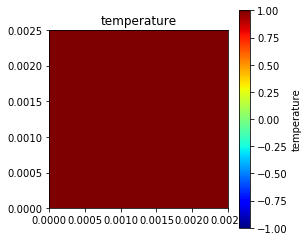

In [22]:
if __name__ == '__main__':
    temperatureViewer = Viewer(vars=temperature,figaspect=1,datamin=0,datamax=1200)

We step the solution in time, plotting as we go interactively

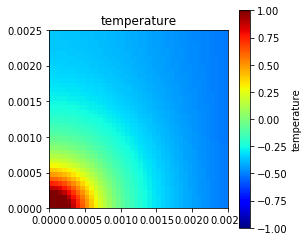

step:  99 Min. temperature 294.29063751589524 Max. temperature 1382.7396790726048


<Figure size 432x288 with 0 Axes>

In [26]:
import fipy.solvers.pyAMG as solvers
#import fipy.solvers.pysparse as solvers
import numpy as np
solver = solvers.linearGMRESSolver.LinearGMRESSolver(precon=None, iterations=1500, tolerance=1e-15) 
poisson= solvers.linearLUSolver.LinearLUSolver()

steps = 100 # number of steps to calculate
eps =1e-5
Tvstime = [] # temperature values during cooling

for i in range(steps):
    terr=10e+10
    temperature.updateOld()
    fi.updateOld()
    fc.updateOld()
    
    # calculate incubation time
    n = calcn(temperature)
    k = calck(0.005,temperature)
    print ("n = {} and k = {}".format(n,k))
    print ("crystalline fraction: {}".format(fc))
    tt = transformation_time(fc,k,n)
    kt = k0*np.exp(-E/(Rt*temperature))
    print ("full transformation time: {}".format(transformation_time(0.95,kt,n)))
    tincubation.setValue(tincubation.value + dt/transformation_time(0.95,kt,n))
    print (tincubation)
    # calculate volume fraction of the crystalline phase
    # the reaction start when incubation time reaches 1.0
    volume_fraction(tt+dt,k,n) 
        
    # update martensite fraction using koistinen-marburger eq.
    # koistinen_marburger(temperature) 
    # update complete volume fraction
    xi = fc + fi
    print (max(xi))
    while(terr > eps):
        print ("Residual %f" % terr)
        terr = temperatureEq.sweep(temperature, dt=dt,solver=poisson)
    
    #print min(phaseSourceT())
    if __name__ == '__main__':
        path = "../../TEST/temperature/"
        temperatureViewer.plot(path+"temperatureBMG"+str(i)+".eps")  
        np.savetxt(path+"temperatureBMG"+str(i),temperature)
        np.savetxt(path+"amorphousBMG"+str(i),fi)
        np.savetxt(path+"crystallineBMG"+str(i),fc)
        Tvstime.append(temperature.value[0])
        print ("step: ", i, "Min. temperature",min(temperature), "Max. temperature", max(temperature))
        

C:\Users\tonii\Anaconda2\envs\idp\lib\site-packages\fipy\viewers\matplotlibViewer\matplotlibViewer.py:229: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  self._cb.set_norm(value)


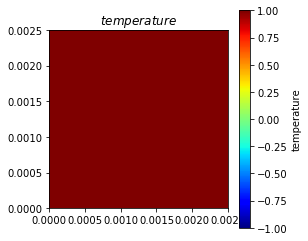

In [27]:
viewerTemperature = Matplotlib2DGridViewer(vars=temperature, title = '$temperature$')

# Visualize the results

C:\Users\tonii\Anaconda2\envs\idp\lib\site-packages\fipy\viewers\matplotlibViewer\matplotlibViewer.py:229: MatplotlibDeprecationWarning: 
The set_norm function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_norm instead.
  self._cb.set_norm(value)


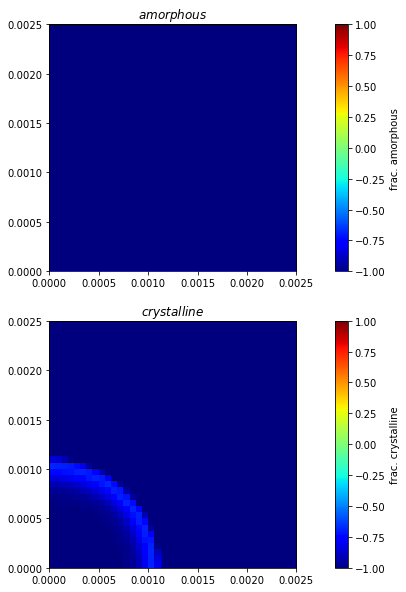

In [28]:
fig1, (axp2, axc2)= plt.subplots(2, 1, sharex=False, sharey=False, figsize=(14,10))

viewer1 = MultiViewer(viewers = (Matplotlib2DGridViewer(vars=fi, title='$amorphous$', axes=axp2, \
                                                       datamin=0., datamax=1000.), \
                                Matplotlib2DGridViewer(vars=fc,  title='$crystalline$'   , axes=axc2, \
                                                       datamin=0., datamax=.1)))


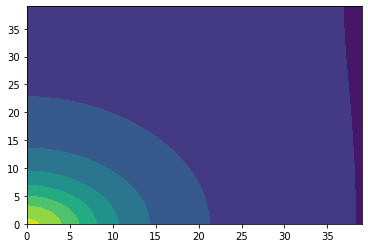

In [29]:
load=np.loadtxt(path+"temperatureBMG99")
fig,ax = plt.subplots()
ax.contourf(load.reshape(N,N))

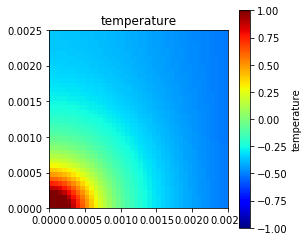

<Figure size 432x288 with 0 Axes>

In [30]:
%matplotlib inline
temperatureViewer.plot(path + "temperature100.png")

Plotting the value of the temperature in the middle of the cylinder at the convection surface.

[Text(0, 0.5, 'Temperature K'),
 Text(0.5, 0, 'timesteps'),
 Text(0.5, 1.0, 'Temperature')]

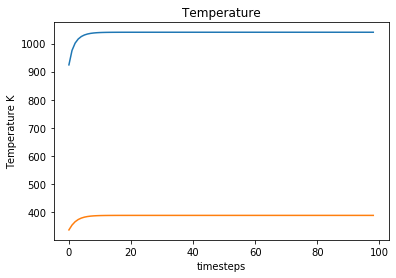

In [31]:
t=[]
t1=[]
for i in range(1,100,1):
    load = np.loadtxt(path+"temperatureBMG"+str(i))
    t.append(load.reshape(N,N)[5,1])
    t1.append(load.reshape(N,N)[20,20])
fig, ax = plt.subplots()
ax.plot(t)
ax.plot(t1)
ax.set(title='Temperature',ylabel='Temperature K',xlabel='timesteps')

Plot of the temperature at central point of the cylinder. The temperature rises on the point and then drops again due to enthalphy of austinite to martensite phase transformation. Is this numerical instability??

[Text(0, 0.5, 'amount %'),
 Text(0.5, 0, 'timesteps'),
 Text(0.5, 1.0, 'Crystalline')]

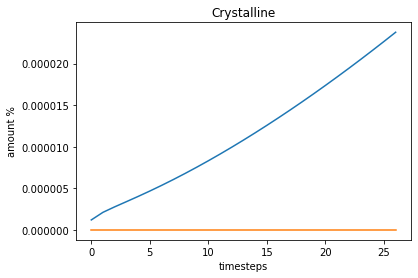

In [32]:
cry = []
cry1 = []
for i in range(1,54,2):
    load = np.loadtxt(path+"crystallineBMG"+str(i))
    cry.append(load.reshape(N,N)[5,1])
    cry1.append(load.reshape(N,N)[20,20])
fig, ax = plt.subplots()
ax.plot(cry)
ax.plot(cry1)
ax.set(title='Crystalline',ylabel='amount %',xlabel='timesteps')

In [33]:
point = []
for i in range(1, 54,2):
    load = np.loadtxt(path+ "amorphousBMG"+str(i))
    point.append(load.reshape(N,N))

### Crystalline and amorphous amounts at end of simulation

Text(0.5, 1.0, 'Amount of crystalline (blue) and amorph (red) phases')

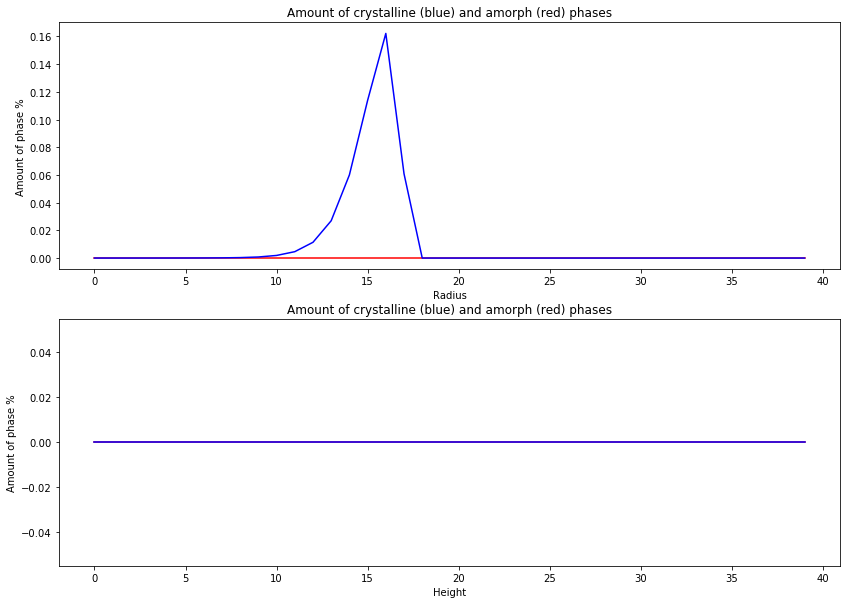

In [34]:
fig2, (axp22, axc22)= plt.subplots(2, 1, sharex=False, sharey=False, figsize=(14,10))

axp22.plot(fi.value.reshape(N,N)[2,:], 'r')
axp22.plot(fc.value.reshape(N,N)[2,:], 'b')
axp22.set_xlabel('Radius')
axp22.set_ylabel('Amount of phase %')
axp22.set_title('Amount of crystalline (blue) and amorph (red) phases')

axc22.plot(fi.value.reshape(N,N)[:,20], 'r')
axc22.plot(fc.value.reshape(N,N)[:,20], 'b')
axc22.set_xlabel('Height')
axc22.set_ylabel('Amount of phase %')
axc22.set_title('Amount of crystalline (blue) and amorph (red) phases')